In [1]:
#основываясь на опыте работы кандидата, обученная модель может сказать, подходит ли он на вакансию Python прогоаммиста. Это поможет менеджерам по подбору персонала быстрее отфильтровывать резюме.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
data = pd.read_csv('hh_database.csv', sep=';')

In [2]:
# фнкция для поиска колличества резюме с уровнем  образования
def education(educat):
    educat = educat.lower()
    educat_split = educat.split(' ')
    if educat_split[0] == 'высшее':
        return 'высшее'
    elif educat_split[0] == 'неоконченное':
        return 'неоконченное высшее'
    elif educat_split[1] == 'специальное':
        return 'среднее специальное'
    elif educat_split[0] == 'среднее':
        return 'среднее'
data_copy = data.copy()
data_copy['Образование'] = data_copy['Образование и ВУЗ'].apply(education)
print(f"Количество резюме с высшим образованием: {data_copy['Образование'].value_counts().loc['высшее']}")
print(f"Количество резюме с неоконченным образованием: {data_copy['Образование'].value_counts().loc['неоконченное высшее']}")
print(f"Количество резюме со специальным образованием: {data_copy['Образование'].value_counts().loc['среднее специальное']}")
print(f"Количество резюме со среднем образованием: {data_copy['Образование'].value_counts().loc['среднее']}")

Количество резюме с высшим образованием: 33863
Количество резюме с неоконченным образованием: 4557
Количество резюме со специальным образованием: 5765
Количество резюме со среднем образованием: 559


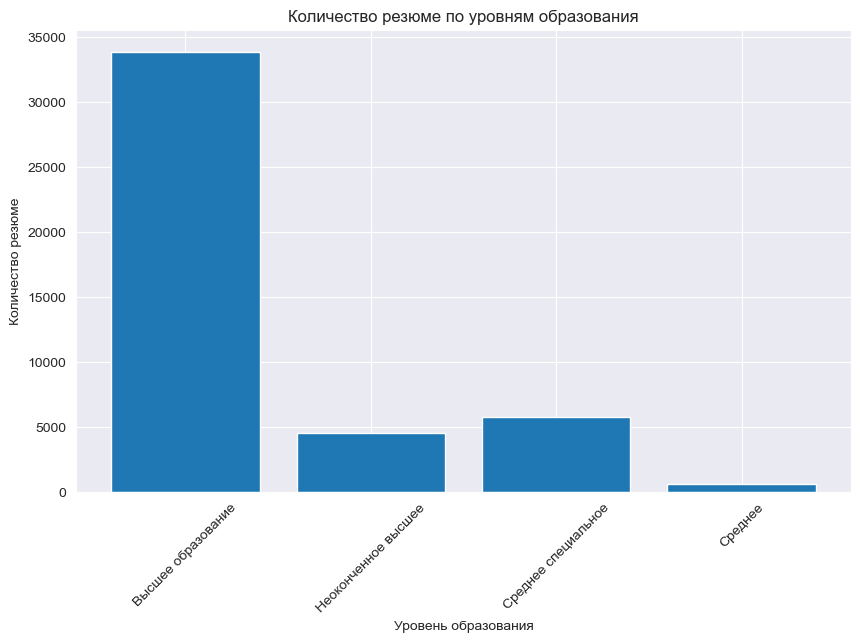

In [3]:
def count_education_levels(data):
    levels = ['высшее', 'неоконченное высшее', 'среднее специальное', 'среднее']
    counts = []
    for level in levels:
        count = data[data['Образование'] == level]['Образование'].count()
        counts.append(count)
    return counts

# Получаем количество резюме с каждым уровнем образования
counts = count_education_levels(data_copy)

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(['Высшее образование', 'Неоконченное высшее', 'Среднее специальное', 'Среднее'], counts)
plt.xlabel('Уровень образования')
plt.ylabel('Количество резюме')
plt.title('Количество резюме по уровням образования')
plt.xticks(rotation=45)
plt.show()

In [4]:
data = pd.read_csv('hh_database.csv', sep=';')
df = pd.DataFrame(data)

def label(words):
    if isinstance(words, str):
    # Проверка наличия определенных слов или фраз
        if 'Python' in words:
            return 'Да'
        elif 'Программист' in words:
            return 'Да'
        else:
            return 'Нет'
    else:
        return 'unknown'
df['label'] = df['Опыт работы'].apply(label) 

print(df)

                                       Пол, возраст           ЗП  \
0        Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1         Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2      Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3          Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4         Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   
...                                             ...          ...   
44739    Мужчина ,  30 лет , родился 17 января 1989   50000 руб.   
44740      Мужчина ,  27 лет , родился 5 марта 1992   39000 руб.   
44741  Женщина ,  48 лет , родилась 26 декабря 1970   40000 руб.   
44742   Мужчина ,  24 года , родился 6 октября 1994   20000 руб.   
44743    Мужчина ,  38 лет , родился 25 апреля 1980  120000 руб.   

                               Ищет работу на должность:  \
0                                Системный администратор   
1                                   Технический писатель   
2  

In [5]:
df.label.value_counts()


label
Нет        39521
Да          5055
unknown      168
Name: count, dtype: int64

In [6]:
# делим на обучающую и тестовую

X_train,X_test,y_train,y_test=train_test_split(df['Опыт работы'], df.label, test_size=0.2, random_state=7)
X_train

25942    Опыт работы 20 лет 6 месяцев  Апрель 2018 — по...
31733    Опыт работы 12 лет 2 месяца  Региональный мене...
32179    Опыт работы 1 год 9 месяцев  Консультант - ана...
40317    Опыт работы 1 год 9 месяцев  Помощник системно...
920      Опыт работы 13 лет 9 месяцев  Февраль 2014 — п...
                               ...                        
34140    Опыт работы 9 месяцев  Май 2018 — Январь  2019...
13927    Опыт работы 9 лет 4 месяца  Системный админист...
919      Опыт работы 13 лет 4 месяца  Май 2008 — по нас...
38467    Опыт работы 4 года 9 месяцев  Технический писа...
10742    Опыт работы 8 лет 6 месяцев  Март 2015 — Февра...
Name: Опыт работы, Length: 35795, dtype: object

In [7]:
y_train

25942    Нет
31733    Нет
32179    Нет
40317    Нет
920      Нет
        ... 
34140    Нет
13927    Нет
919      Нет
38467    Нет
10742    Нет
Name: label, Length: 35795, dtype: object

In [8]:

X_train_filled = X_train.fillna('')
X_test_filled = X_test.fillna('')
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train_filled)
tfidf_test = tfidf_vectorizer.transform(X_test_filled)

In [9]:

pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [10]:
y_pred=pac.predict(tfidf_test)

In [11]:
# ищем точность
score=accuracy_score(y_test,y_pred)
print(f'Точность: {round(score*100,2)}%')

Точность: 92.86%


In [12]:

experience=['Опыт работы 16 лет 10 месяцев  Август 2010 — по настоящее время 8 лет 10 месяцев МАОУ "СОШ № 1 г.Немана" Системный администратор Обслуживание ПК,установка ПО, ремонт, периферийной техники, Интернет локальная сеть. Ведение Электронного журнала, сайта организации.  Август 2002 — Август  2010 8 лет 1 месяц ТС "ВЕСТЕР-ИНФО" Старший продавец, директор отдела Продажи компьютерной техники']
experience=tfidf_vectorizer.transform(experience)
y_pred=pac.predict(experience)
y_pred

array(['Нет'], dtype='<U7')

In [13]:

experience_2=['Опыт работы 11 лет 6 месяцев  Golang разработчик 60 000 руб. Информационные технологии, интернет, телеком Программирование, Разработка Инженер Занятость: полная занятость График работы: гибкий график, полный день Опыт работы 11 лет 6 месяцев Июнь 2015 — по настоящее время 3 года 11 месяцев Eastwood Программист Python Разработка сервисов на Python, Django. В настоящее время Go, Revel Июнь 2012 — Октябрь  2014 2 года 5 месяцев Пензенский Государственный Университет Архитектуры И Строительства (ПГУАС) Пенза Ведущий инженер-программист Администрирование Linux серверов (CentOs) Разработка приложений на Ruby on Rails. Январь 2011 — Июнь  2012 1 год 6 месяцев к/к Современник Пенза Системный администратор Разработка и поддержка программы смс уведомлений пользователей и других сервисов для к/к на Python и JavaScript. Системное администрирование Февраль 2010 — Декабрь  2010 11 месяцев Пензенский Государственный Университет Архитектуры И Строительства (ПГУАС) Пенза Ведущий инженер-программист Администрирование Linux серверов (CentOs). Ноябрь 2007 — Декабрь  2009 2 года 2 месяца ООО Мороз Пенза Системный администратор Администрирование Windows Server 2003, MSSQL, DHCP, DNS, Exchange Server. Обслуживание и администрирование 1с 7.7 Организация и обслуживание рабочих мест, оргтехники. Прокладка и настройка ЛВС. Март 2007 — Ноябрь  2007 9 месяцев ИПКиПРО Пенза Системный администратор Администрирование сетей, баз данных, обеспечение проведения ЕГЭ. Ключевые навыки Теперь резюме открыто всему интернету — изменить можно в настройках видимости. Python Go Linux PostgreSQL Git HTML Возникли неполадки. Попробуйте еще раз. Высшее образование 2007 Кликнув на название учебного заведения вы сможете найти кандидатов из этого вуза. Пензенский государственный университет, Пенза Факультет вычислительной техники, Математическое обеспечение и применение ЭВМ Знание языков Русский — Родной Английский — B2 — Средне-продвинутый Гражданство, время в пути до работы Гражданство: Россия Разрешение на работу: Россия Желательное время в пути до работы: Не имеет значения  Опыт работы 11 лет 6 месяцев Июнь 2015 — по настоящее время 3 года 11 месяцев Eastwood Программист Python Разработка сервисов на Python, Django. В настоящее время Go, Revel Июнь 2012 — Октябрь  2014 2 года 5 месяцев Пензенский Государственный Университет Архитектуры И Строительства (ПГУАС) Пенза Ведущий инженер-программист Администрирование Linux серверов (CentOs) Разработка приложений на Ruby on Rails. Январь 2011 — Июнь  2012 1 год 6 месяцев к/к Современник Пенза Системный администратор Разработка и поддержка программы смс уведомлений пользователей и других сервисов для к/к на Python и JavaScript. Системное администрирование Февраль 2010 — Декабрь  2010 11 месяцев Пензенский Государственный Университет Архитектуры И Строительства (ПГУАС) Пенза Ведущий инженер-программист Администрирование Linux серверов (CentOs). Ноябрь 2007 — Декабрь  2009 2 года 2 месяца ООО Мороз Пенза Системный администратор Администрирование Windows Server 2003, MSSQL, DHCP, DNS, Exchange Server. Обслуживание и администрирование 1с 7.7 Организация и обслуживание рабочих мест, оргтехники. Прокладка и настройка ЛВС. Март 2007 — Ноябрь  2007 9 месяцев ИПКиПРО Пенза Системный администратор Администрирование сетей, баз данных, обеспечение проведения ЕГЭ.  Июнь 2015 — по настоящее время 3 года 11 месяцев Eastwood Программист Python Разработка сервисов на Python, Django. В настоящее время Go, Revel  Июнь 2012 — Октябрь  2014 2 года 5 месяцев Пензенский Государственный Университет Архитектуры И Строительства (ПГУАС) Пенза Ведущий инженер-программист Администрирование Linux серверов (CentOs) Разработка приложений на Ruby on Rails.  Январь 2011 — Июнь  2012 1 год 6 месяцев к/к Современник Пенза Системный администратор Разработка и поддержка программы смс уведомлений пользователей и других сервисов для к/к на Python и JavaScript. Системное администрирование  Февраль 2010 — Декабрь  2010 11 месяцев Пензенский Государственный Университет Архитектуры И Строительства (ПГУАС) Пенза Ведущий инженер-программист Администрирование Linux серверов (CentOs).  Ноябрь 2007 — Декабрь  2009 2 года 2 месяца ООО Мороз Пенза Системный администратор Администрирование Windows Server 2003, MSSQL, DHCP, DNS, Exchange Server. Обслуживание и администрирование 1с 7.7 Организация и обслуживание рабочих мест, оргтехники. Прокладка и настройка ЛВС.  Март 2007 — Ноябрь  2007 9 месяцев ИПКиПРО Пенза Системный администратор Администрирование сетей, баз данных, обеспечение проведения ЕГЭ.']

experience_2=tfidf_vectorizer.transform(experience_2)
y_pred=pac.predict(experience_2)
y_pred

array(['Да'], dtype='<U7')

In [18]:
import pickle
Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(pac, file)

In [19]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

PassiveAggressiveClassifier(max_iter=50)